In [1]:
import f3dasm
import numpy as np
import time

2022-11-21 09:56:02.288196: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-21 09:56:02.366906: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
dim = 3
iterations = 50
realizations = 3
bounds = np.tile([-1.0,1.0], (dim, 1))
hyperparameters={}
#hyperparameters={'learning_rate': 1e-2}

design = f3dasm.make_nd_continuous_design(bounds=bounds, dimensionality=dim)

function = f3dasm.functions.Levy(dimensionality=dim, scale_bounds=bounds, seed=42, noise=0.3)

data = f3dasm.Data(design=design)
optimizer = f3dasm.optimization.CMAESAdam(data=data, hyperparameters=hyperparameters)
sampler = f3dasm.sampling.LatinHypercube(design=design)


# all_data = f3dasm.run_multiple_realizations(optimizer=optimizer, 
# function=function,
# sampler=sampler,
# iterations=iterations,
# realizations=realizations
# )


In [3]:
optimizer.parameter

OptimizerParameters(population=1, force_bounds=True)

In [4]:
args = {
'optimizer': optimizer, 
'function': function,
'sampler': sampler,
'iterations': iterations,
'seed': 1


}

res = f3dasm.run_optimization(**args)

Optimizing for 25 iterations with CMAES


2022-11-21 09:56:04.402229: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Optimizing for 25 iterations with Adam


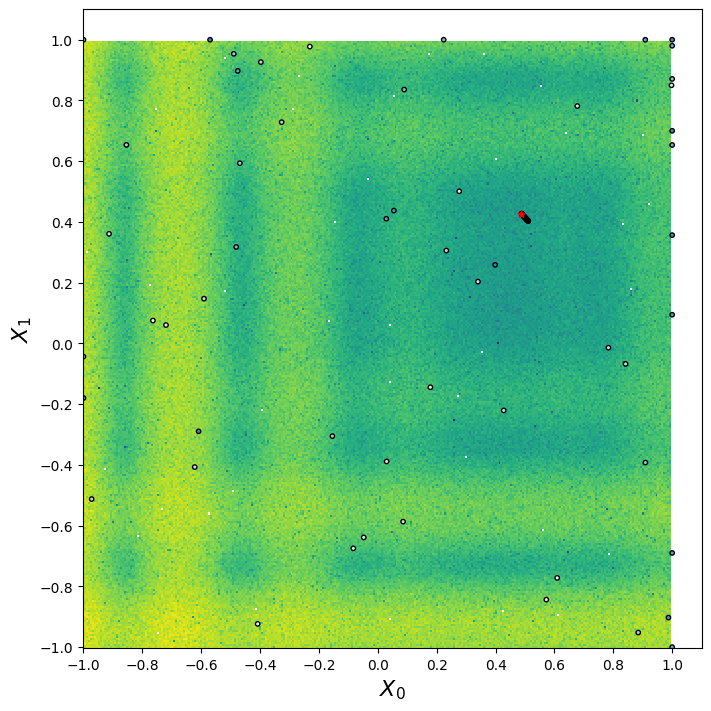

In [5]:
function.plot_data(data=res,domain=bounds)
xv, yv, Y = function._create_mesh(px=300,domain=bounds)

(<Figure size 700x700 with 1 Axes>,
 <Axes3DSubplot: xlabel='$X_{0}$', ylabel='$X_{1}$', zlabel='$f(X)$'>)

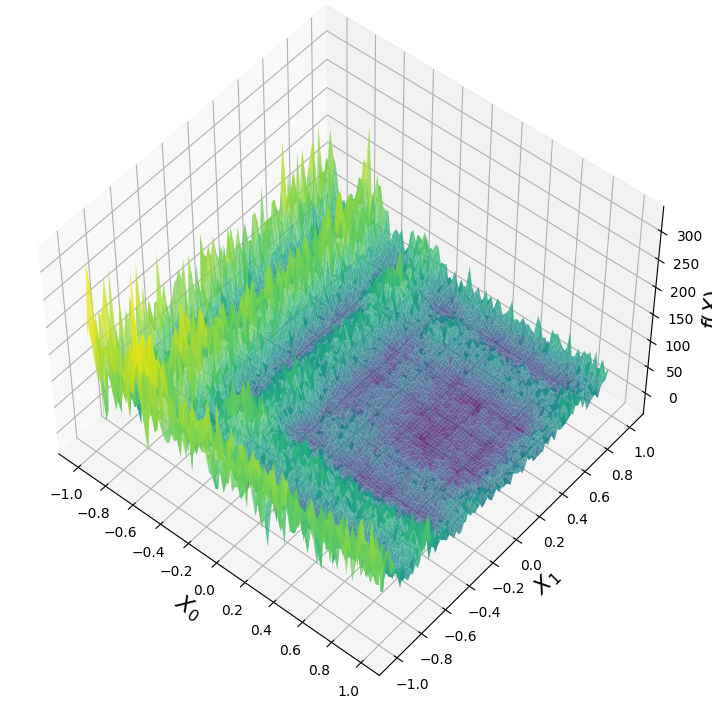

In [6]:
function.plot(px=100, domain=bounds)

In [7]:
# f3dasm.write_pickle('Levyfunction_2D', Y)

Y_check = f3dasm.read_pickle('Levyfunction_2D')

assert (Y_check == Y).all()

FileNotFoundError: [Errno 2] No such file or directory: 'Levyfunction_2D.obj'

In [ ]:
# args = {
# 'realizations': realizations,
# 'optimizer': optimizer, 
# 'function': function,
# 'sampler': sampler,
# 'iterations': iterations,
# 'parallelization': True


# }
# f3dasm.run_multiple_realizations(**args)

In [ ]:
# """Run multiple realizations of the same algorithm on a benchmark function"""
# start_t = time.perf_counter()

# seed = np.random.randint(low=0, high=1e5)
# all_data = []

# for _ in range(realizations):
#     data = f3dasm.run_optimization(
#         optimizer=optimizer, function=function, sampler=sampler, iterations=iterations, seed=seed
#     )
#     all_data.append(data)

#     # Increase seed
#     seed += 1

# end_t = time.perf_counter()

# total_duration = end_t - start_t
# print(f"Optimization took {total_duration:.2f}s total")

In [ ]:
from pathos.helpers import mp

In [ ]:
"""Run multiple realizations of the same algorithm on a benchmark function"""
start_t = time.perf_counter()

args = [(optimizer, function,  sampler, iterations, np.random.randint(low=0, high=1e5)) for _ in range(realizations)]



with mp.Pool() as pool:
    results = pool.starmap(f3dasm.run_optimization, args)
    
end_t = time.perf_counter()

total_duration = end_t - start_t
print(f"Optimization took {total_duration:.2f}s total")

In [ ]:
function.plot_data(data=results[1], domain=bounds)

In [ ]:
"""Run multiple realizations of the same algorithm on a benchmark function"""
start_t = time.perf_counter()

args = [(optimizer, function,  sampler, iterations, np.random.randint(low=0, high=1e5)) for _ in range(realizations)]


with Pool() as pool:
    results = pool.starmap_async(f3dasm.run_optimization, args)
    
end_t = time.perf_counter()

total_duration = end_t - start_t
print(f"Optimization took {total_duration:.2f}s total")

In [ ]:
results

In [ ]:
func.dfdx(np.array([0.5, 0.8]))

In [ ]:
if dim == 2:
    fig, ax = func.plot_data(all_data[0], px=100, domain=bounds)
    ax.scatter(func.get_global_minimum(dim)[0][0],func.get_global_minimum(dim)[0][1], s=40, c='r')
    #ax.scatter(-3.19468541,0.89682456, s=40, c='g')
    func.plot(px=100, domain=bounds)

In [ ]:
y = np.array([[0.2,0.1],[0.3,0.4]])
y + np.abs(func.get_global_minimum(2)[1])

In [ ]:
all_data[0].data['input']

In [ ]:
func.scale_bounds, func.input_domain

In [ ]:
import pandas as pd
mean_y = pd.concat([d.get_output_data() for d in all_data], axis=1).mean(axis=1)
std_y = pd.concat([d.get_output_data() for d in all_data], axis=1).std(axis=1)
mean_y

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.figure(), plt.axes()
ax.plot(mean_y)
ax.fill_between(np.arange(len(mean_y)), mean_y-1.96*std_y, mean_y+1.96*std_y, color='b', alpha=.1)
#ax.set_yscale('log')
fig.show()

In [ ]:
func.get_global_minimum(2)

In [ ]:
func.descale_input(np.array([0.0,0.0]))
x = np.array([[0.0,0.0]])

In [ ]:
func.input_domain

In [ ]:
(func.input_domain[:, 1] - func.input_domain[:, 0]) * x + func.input_domain[:, 0]

In [ ]:
(x - func.input_domain[:, 0]) / (func.input_domain[:, 1] - func.input_domain[:, 0])

In [ ]:
x

In [ ]:
func.input_domain[:, 0]

In [ ]:
x - func.input_domain[:, 0]

In [ ]:
(func.input_domain[:, 1] - func.input_domain[:, 0])

In [ ]:
o = np.array([[0.9,0.3]])
o

In [ ]:
func.scale_input(func.descale_input(o))

In [ ]:
func.descale_input(func.scale_input(o))
o

In [ ]:
scale_bounds = [-3., 1.]

In [ ]:
o = np.random.uniform(low=scale_bounds[0], high=scale_bounds[1], size=(1, func.dimensionality))
x = o
x

In [ ]:
(func.input_domain[:, 1] - func.input_domain[:, 0])

In [ ]:
(x - func.scale_bounds[:, 0]) / (func.scale_bounds[:, 1] - func.scale_bounds[0])

In [ ]:
func.offset

In [ ]:
func.get_global_minimum(2)[0]

In [ ]:
(func.scale_bounds[:, 1] - func.scale_bounds[0])